<a href="https://colab.research.google.com/github/A24bhi/DS-PROJECT4-CSGO-GAME/blob/main/CSGO_VideoGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/csgo.csv')
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [ ]:
df['round_winner'].value_counts()

,count
round_winner,
T,62406
CT,60004


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

4962

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['map'].value_counts(normalize=True)*100

,proportion
map,
de_inferno,19.567809
de_dust2,18.094816
de_nuke,15.392344
de_mirage,15.149683
de_overpass,11.472311
de_train,10.999762
de_vertigo,9.199816
de_cache,0.123459


In [ ]:
#As of the above input we can say that de_inferno map isthe most famous and the de_cache wass the least
df[df['map']=='de_inferno']['round_winner'].value_counts()
df[df['map']=='de_cache']['round_winner'].value_counts()

,count
round_winner,
CT,103
T,42


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
encoder=LabelEncoder()

In [ ]:
cat_cols=[]
for x in df.columns:
  if(df[x].dtype=='object')|(df[x].dtype=='bool'):
    cat_cols.append(x)

cat_cols

['map', 'bomb_planted', 'round_winner']

In [ ]:
for x in cat_cols:
  df[x]=encoder.fit_transform(df[x])

df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
x=df.drop('round_winner',axis=1)
y=df['round_winner']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
#Now Standardize the Data

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
# LDA - Dimensonality Reduction Technique

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
ldaObject=LDA()

In [ ]:
ldaObject.fit(x_train_scaled,y_train)

LinearDiscriminantAnalysis()

In [ ]:
ldaObject.transform(x_test_scaled)
pd.DataFrame(ldaObject.coef_)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.138778,-0.016821,0.014744,-0.087712,0.243005,-0.458167,0.321909,-0.609036,0.640424,-0.213802,...,0.03217,-0.175818,0.058859,-0.239229,0.105469,-0.009157,0.008375,-0.094185,-0.002616,0.022922


In [ ]:
ldaCoeff=np.exp(np.abs(ldaObject.coef_)).flatten()

In [ ]:
no_of_features=x.shape[1]
features_list=np.arange(no_of_features)
features_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [ ]:
features_names=list(x.columns)

In [ ]:
# Visualize the Importance of this Feature

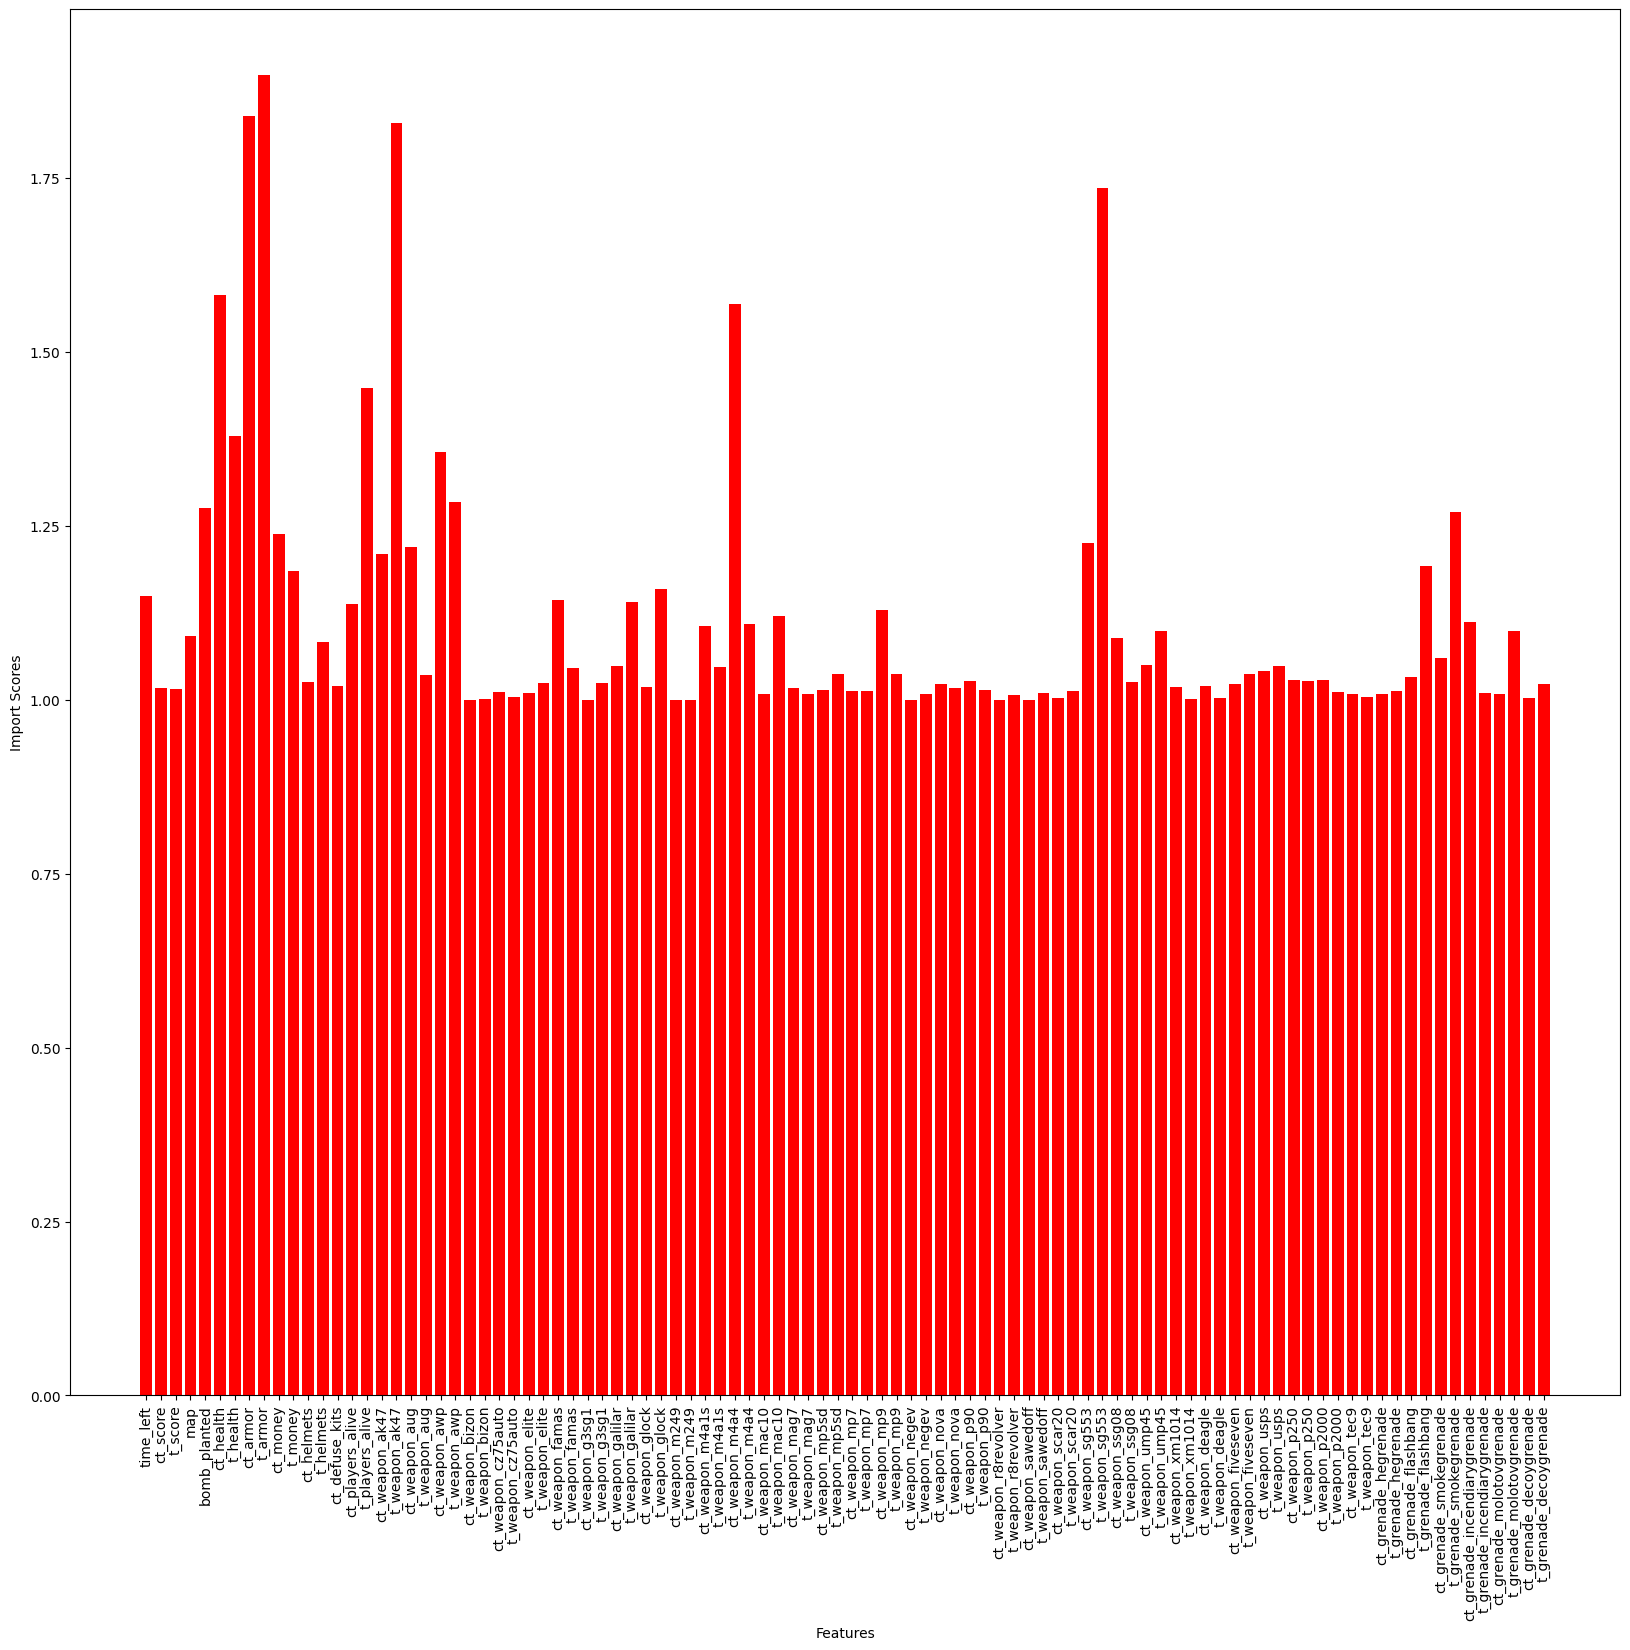

In [ ]:
plt.figure(figsize=(20,18))
plt.bar(features_list,ldaCoeff,color='red')
plt.xticks(features_list,features_names,rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Import Scores')
plt.show()

In [ ]:
df_feature_score=pd.DataFrame({'Feature Name': features_names,'Feature Importance':ldaCoeff})
df_feature_score.head()

,Feature Name,Feature Importance
0,time_left,1.148869
1,ct_score,1.016964
2,t_score,1.014853
3,map,1.091674
4,bomb_planted,1.275076


In [ ]:
# The 35 Most Features

In [ ]:
top_35_values=df_feature_score.nlargest(35,'Feature Importance')
top_35_values

,Feature Name,Feature Importance
8,t_armor,1.897286
7,ct_armor,1.838659
17,t_weapon_ak47,1.829586
65,t_weapon_sg553,1.735791
5,ct_health,1.581173
40,ct_weapon_m4a4,1.569209
15,t_players_alive,1.448475
6,t_health,1.379760
20,ct_weapon_awp,1.355603
21,t_weapon_awp,1.283719


In [ ]:
x_selected = df[top_35_values['Feature Name']]
x_train_lda,x_test_lda,y_train_lda,y_test_lda=train_test_split(x_selected,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=LogisticRegression()
model.fit(x_train_lda,y_train)
pred=model.predict(x_test_lda)
print(accuracy_score(y_test_lda,pred))

0.7443975206048634


In [ ]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7463728628839997


In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train_lda,y_train_lda)
dt_pred=dt.predict(x_test_lda)
print(accuracy_score(y_test_lda,dt_pred))

0.7983447994005858


In [ ]:
#  Finally Decision Tree Classifier get the Best numbers.